<a href="https://www.kaggle.com/code/devanggiri/logistic-regression-guide?scriptVersionId=158932426" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Logistic Regression

 Sales Prediction

The aim is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv(r"/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv")

In [3]:
dataset.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Pre-Processing

In [4]:
dataset.shape

(200, 5)

**1. Checking for missing values**

In [5]:
dataset.isna().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

**Conclusion:** The dataset does not have missing values

**2. Checking for duplicate rows**

In [6]:
dataset.duplicated().any()

False

**Conclusion:** There are no duplicate rows present in the dataset

**3. Checking for outliers**

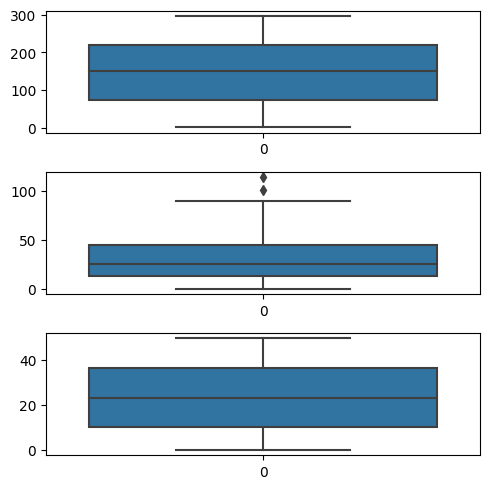

In [7]:
# 3. Checking for outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV Ad Budget ($)'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper Ad Budget ($)'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio Ad Budget ($)'], ax =axs[2])
plt.tight_layout()

**Conclusion:** There are not that extreme values present in the dataset

# Exploratory Data Analysis

**1. Distribution of the target variable**

/tmp/ipykernel_18/185581810.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales ($)']);


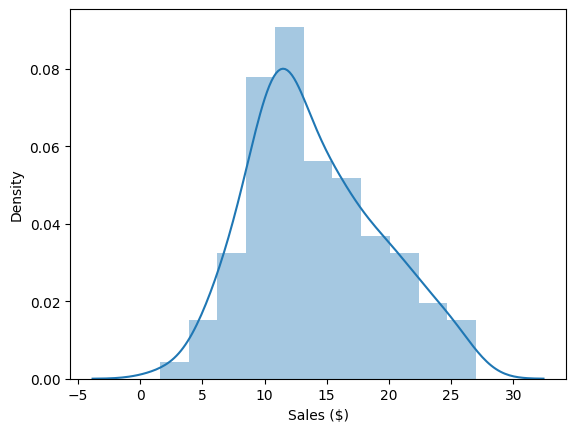

In [8]:
# 1. Distribution of the target variable
sns.distplot(dataset['Sales ($)']);
plt.show()

**Conclusion:** It is normally distributed

**2. How Sales are related with other variables**

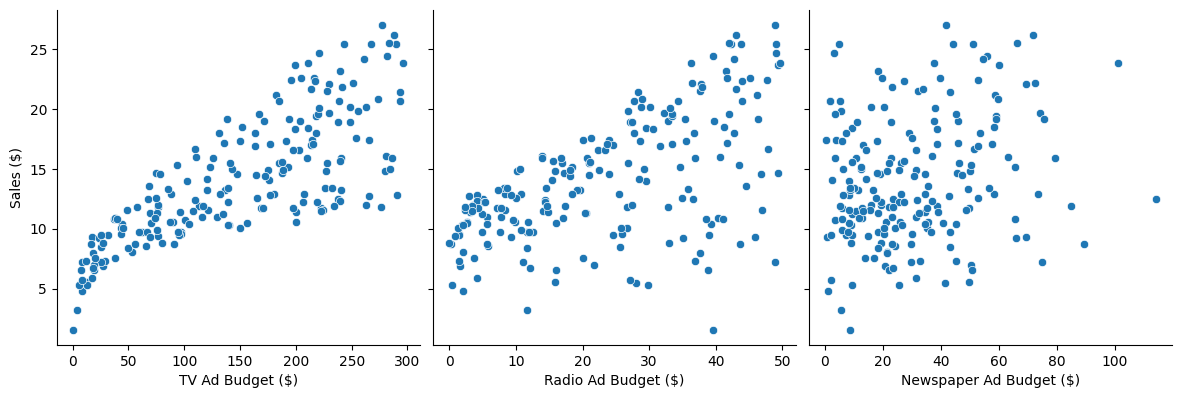

In [9]:
sns.pairplot(dataset, x_vars=['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)'], y_vars='Sales ($)', height=4, aspect=1, kind='scatter')
plt.show()

**Conclusion:** TV is strongly, positively, linearly correlated with the target variable. Bu the Newspaper feature seems to be uncorrelated

**3. Heatmap**

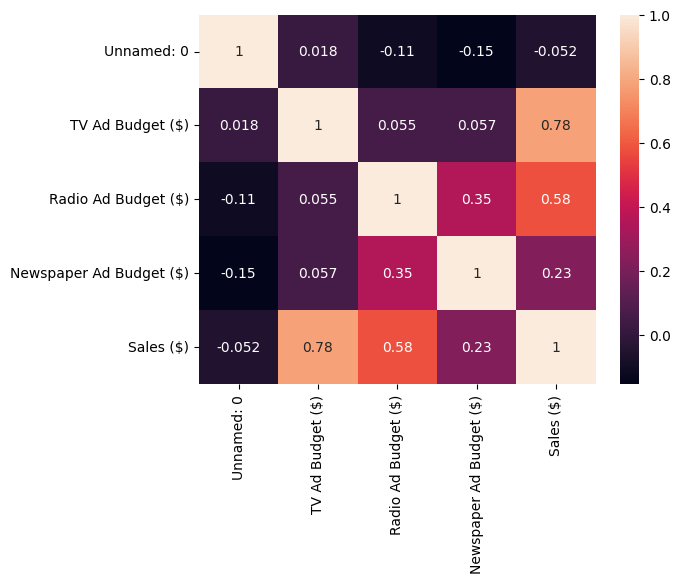

In [10]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

**Conclusion:** TV seems to be most correlated with Sales as 0.9 is very close to 1

# Model Building

**Logistic Regression**

Logistic Regression is a statistical method used for binary classification, predicting the probability of an instance belonging to a particular class. It employs the sigmoid function to map real values into probabilities (between 0 and 1). The model is represented as:

**Formula:**
P(Y=1)= 1/1+e^[−1(β0+β1X)]

P(Y=1): Probability of belonging to class 1.
•	β0: Intercept.
•	β1: Coefficient for feature X.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
#Setting the value for X and Y
X = dataset[['TV Ad Budget ($)']]
y = dataset['Sales ($)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [13]:
threshold = 10  # Set a threshold value based on your problem

# Create a new binary target variable
dataset['Purchased'] = np.where(dataset['Sales ($)'] > threshold, 1, 0)

# Now 'Purchased' is a binary target variable
X = dataset[['TV Ad Budget ($)']]
y = dataset['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Creating and training the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Printing the model coefficients
print('Intercept:', logreg.intercept_)
print('Coefficient:', logreg.coef_)


Intercept: [-3.17350588]
Coefficient: [[0.05023733]]


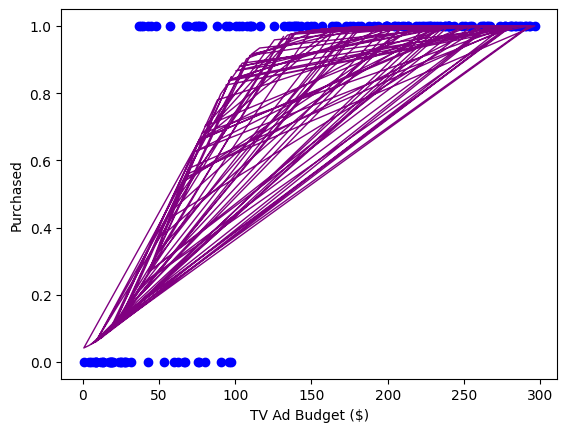

In [15]:
# Plotting the decision boundary
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, logreg.predict_proba(X_train)[:, 1], color='purple', linewidth=1)
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Purchased')
plt.show()


In [16]:
# Prediction on the test set
y_pred_logreg = logreg.predict(X_test)

In [17]:
print("Prediction for test set: {}".format(y_pred_logreg))

Prediction for test set: [0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1]


In [18]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_logreg})
slr_diff

,Actual value,Predicted value
126,0,0
104,1,1
99,1,1
92,1,1
111,1,1
167,1,1
116,1,1
96,1,1
52,1,1
69,1,1


In [19]:
# Model evaluation
accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
precision = metrics.precision_score(y_test, y_pred_logreg)
recall = metrics.recall_score(y_test, y_pred_logreg)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.9333333333333333
Precision: 0.9423076923076923
Recall: 0.98


Accuracy of this model is 93%

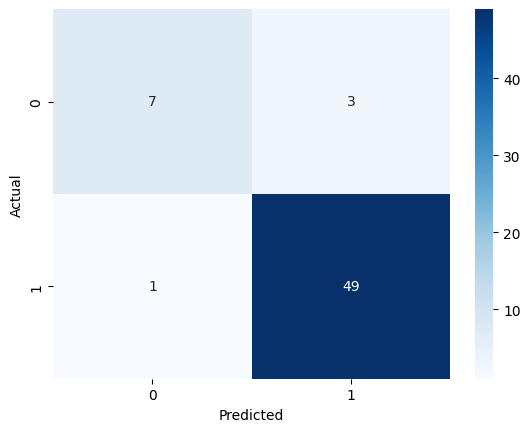

In [20]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()